## 大窑汽水数据洞察 in Jupyter Notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 搜索趋势-品牌词包
趋势可视化，直接从类目热度趋势通用代码改

导入数据，数据结构

In [3]:
df = pd.read_csv('./csv/搜索趋势-品牌词包-近365.csv')

df.shape

(2536, 4)

In [4]:
print(df.columns)

Index(['搜索词1（小写去空格）', '__timestamp_dtm', '新增搜索指数（非广告导流）【脱敏】',
       '新增搜索指数（含广告跳搜索页）【脱敏】'],
      dtype='object')


重新命名，让自己的代码引用更方便

In [5]:
#rename
names_1 = ['word','time','searchIndex_1','searchIndex_2']
df.columns = names_1
print(df.columns)

Index(['word', 'time', 'searchIndex_1', 'searchIndex_2'], dtype='object')


转化时间类型，减少seaborn识别负担

In [6]:
# datetime coversion
df['time'] = pd.to_datetime(df['time'])

Pivot Table，把长表变成宽表，让excel也能一键画图

In [7]:
df2 = df.pivot_table(index = 'word', columns = 'time', values = 'searchIndex_2', aggfunc='sum')
df2.head()

time,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-28,2021-08-29,2021-08-30,2021-08-31,2021-09-01,2021-09-02,...,2022-08-14,2022-08-15,2022-08-16,2022-08-17,2022-08-18,2022-08-19,2022-08-20,2022-08-21,2022-08-22,2022-08-23
word,,,,,,,,,,,,,,,,,,,,,
华洋汽水,0.10,0.10,0.08,0.07,0.11,0.14,0.08,0.12,0.04,0.14,...,0.89,0.80,0.81,0.75,0.76,0.84,0.86,0.91,0.73,0.71
可口可乐,2.51,2.36,2.04,1.79,3.62,3.25,3.15,2.67,2.75,2.72,...,7.36,7.97,7.76,7.81,7.46,6.83,6.80,6.39,7.22,7.55
大窑汽水,0.17,0.16,0.13,0.14,0.15,0.15,0.35,0.14,0.12,0.12,...,1.33,1.27,1.14,1.16,1.27,1.42,1.60,1.39,1.19,1.11
宏宝莱汽水,0.03,0.04,0.03,0.03,0.04,0.06,0.04,0.04,0.02,0.01,...,0.04,0.03,0.05,0.04,0.04,0.02,0.04,0.05,0.02,0.02
弹珠汽水,0.28,0.27,0.24,0.24,0.31,0.31,0.22,0.23,0.17,0.15,...,0.68,0.53,0.53,0.38,0.38,0.46,0.49,0.55,0.47,0.40


In [8]:
#write the csv
df2.to_csv('./PivotedDaYao.csv', encoding = 'utf_8_sig')

根据大趋势，筛选数据

In [9]:
#conditional selection & drop things 自行修改条件

df = df.drop(df[df['word'] == '弹珠汽水'].index)



In [10]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

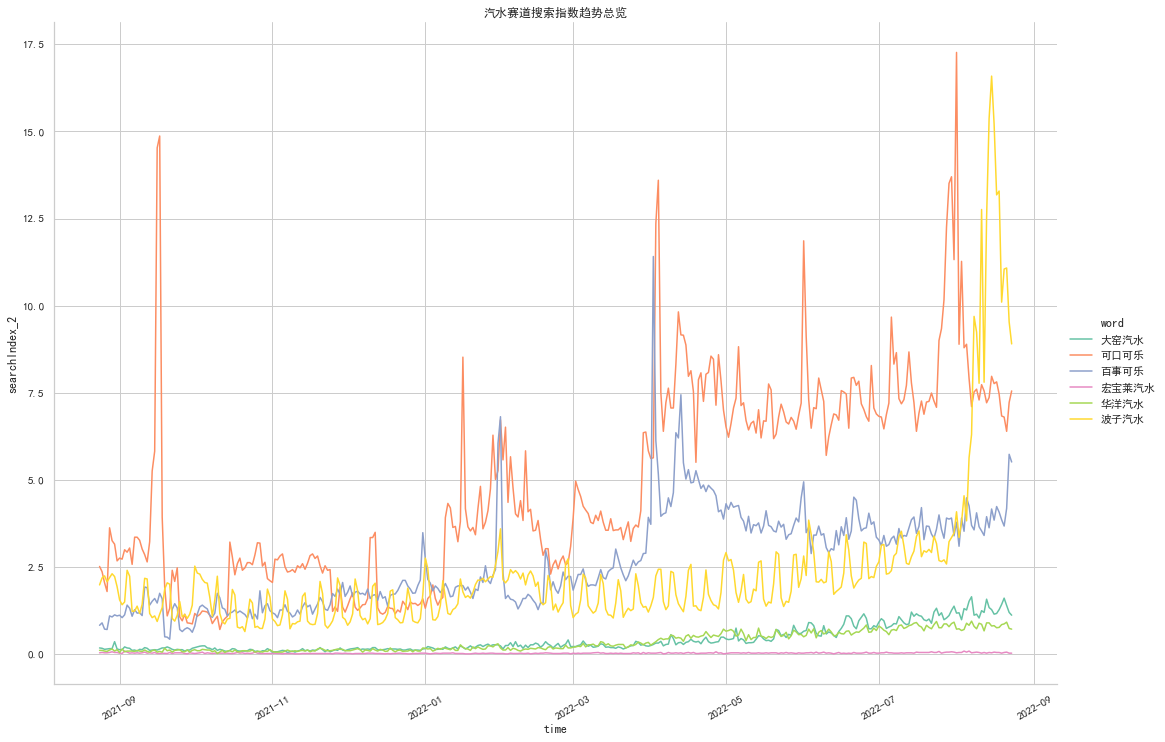

In [11]:
#standard line plot
sns.set_theme(style = 'whitegrid', font= 'SimHei')
ax = sns.relplot(data = df, x = 'time', y = 'searchIndex_2', hue = 'word', 
kind = 'line',palette = 'Set2', legend = 'auto', height = 10, aspect = 1.5)
ax.set_xticklabels(rotation = 30)
plt.title('汽水赛道搜索指数趋势总览')
plt.show()

创建新图表，剔除头部品牌，让大窑汽水的直接竞争情况更明显。

In [12]:
df_3 = df[df['word'] == '大窑汽水']
df_3 = pd.merge (df_3, df[df['word'] == '宏宝莱汽水'], how = 'outer')
df_3 = pd.merge (df_3, df[df['word'] == '华洋汽水'], how = 'outer')

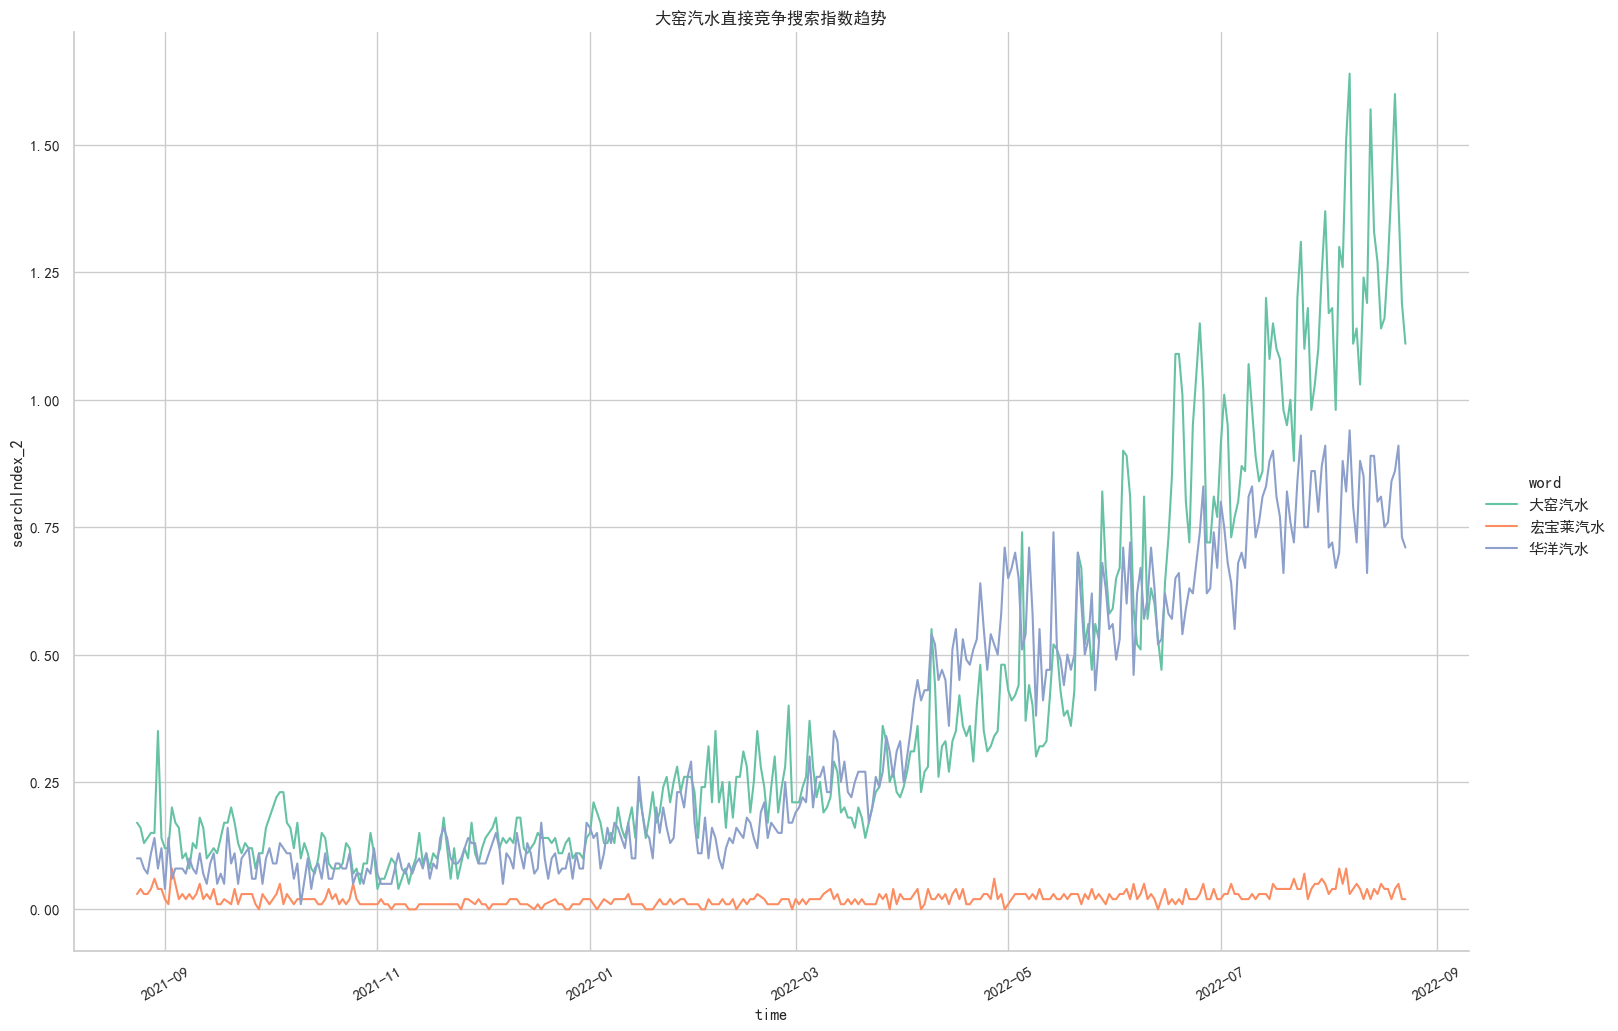

In [13]:
sns.set_theme(style = 'whitegrid', font= 'SimHei')
ax = sns.relplot(data = df_3, x = 'time', y = 'searchIndex_2', hue = 'word', 
kind = 'line',palette = 'Set2', legend = 'auto', height = 10, aspect = 1.5)
ax.set_xticklabels(rotation = 30)
plt.title('大窑汽水直接竞争搜索指数趋势')
plt.show()

结论：在小红书站内，大窑汽水在直接竞争赛道里拔得头筹，搜索指数一路高涨的同时和华洋汽水拉开了差距。


### 城市专项洞察，搜索词排名-（美食）汽水-近90天 （一二线城市）+（三四线城市）
销售沟通中，大窑汽水下沉市场做的比较好，想要进军一二线城市。
排名类比较适合的可视化方案：Barplot

In [14]:
cityTier1_2 = pd.read_csv('./csv/搜索词排名-（美食）汽水-近90天-一线新一线二线.csv')
cityTier3_4 = pd.read_csv('./csv/搜索词排名-（美食）汽水-近90天-三线四线五线.csv')

cityTier1_2.shape,cityTier3_4.shape

((1000, 6), (1000, 6))

In [15]:
cityTier1_2.columns,cityTier3_4.columns

(Index(['搜索词', '搜索词一级类目', '搜索词二级类目', '搜索词三级类目', '新增搜索指数（非广告导流）【脱敏】',
        '新增搜索指数（含广告跳搜索页）【脱敏】'],
       dtype='object'),
 Index(['搜索词', '搜索词一级类目', '搜索词二级类目', '搜索词三级类目', '新增搜索指数（非广告导流）【脱敏】',
        '新增搜索指数（含广告跳搜索页）【脱敏】'],
       dtype='object'))

In [16]:
names = ['word','c1','c2','c3','searchIndex_1','searchIndex_2']
cityTier1_2.columns = names
cityTier3_4.columns = names

预览csv文件后觉得关键词太多画图困难，决定选取前十名
数据清理工作：

In [17]:
cityTier1_2 = cityTier1_2[0:12]
cityTier1_2 = cityTier1_2.drop(cityTier1_2[cityTier1_2['word'] == '汽水肉做法'].index)
cityTier1_2 = cityTier1_2.drop(cityTier1_2[cityTier1_2['word'] == '汽水肉'].index)

cityTier3_4 = cityTier3_4[0:10]

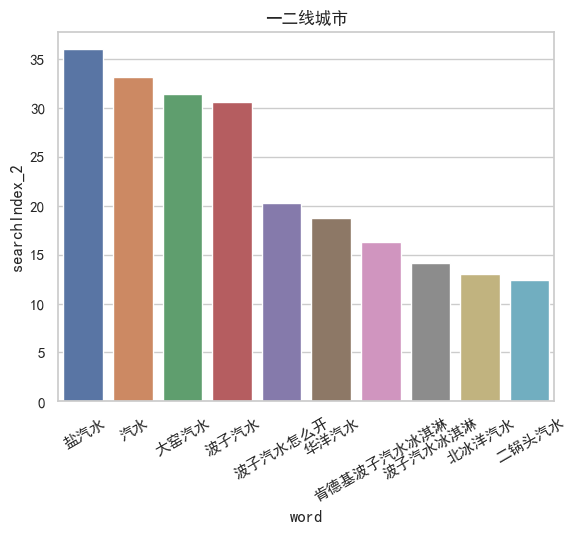

In [18]:

sns.set_theme(style = 'whitegrid', font= 'SimHei')
ax = sns.barplot(data = cityTier1_2, x = 'word', y = 'searchIndex_2',)
plt.title('一二线城市')
plt.xticks(rotation = 30)
plt.show()

一二线城市热衷于搜索盐汽水，大窑汽水的盐汽水可以抓住细分品类机会作为主推品。同样大窑汽水站内在一二线城市用户中积累的声量需要营销来点爆出圈。

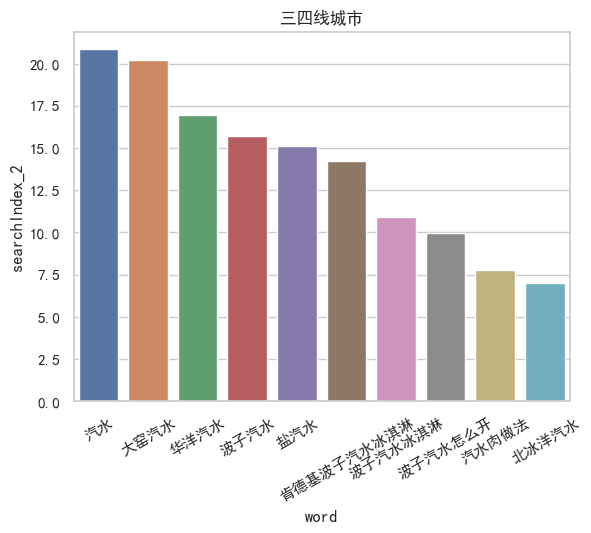

In [19]:
#standard line plot
sns.set_theme(style = 'whitegrid', font= 'SimHei')
ax = sns.barplot(data = cityTier3_4, x = 'word', y = 'searchIndex_2',)
plt.title('三四线城市')
plt.xticks(rotation = 30)
plt.show()

### 上下游词 - 大窑 - 大窑汽水
主要会用到词云和关系网络图

In [41]:
import networkx as nx

In [42]:
plt.rcParams['figure.autolayout'] = True 
plt.rcParams['font.sans-serif'] = ['SimHei']

In [43]:
up_downSearch_1 = pd.read_csv('./csv/上下游词-大窑-近90天.csv')

In [44]:
up_downSearch_1 = up_downSearch_1[0:20]
names = ['keyword','searchword','UpOccurence','DownOccurence']
up_downSearch_1.columns = names
up_downSearch_1['UpOccurence'] = np.log(up_downSearch_1['UpOccurence'])

### 上游词

C:\Users\wangjunzhe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


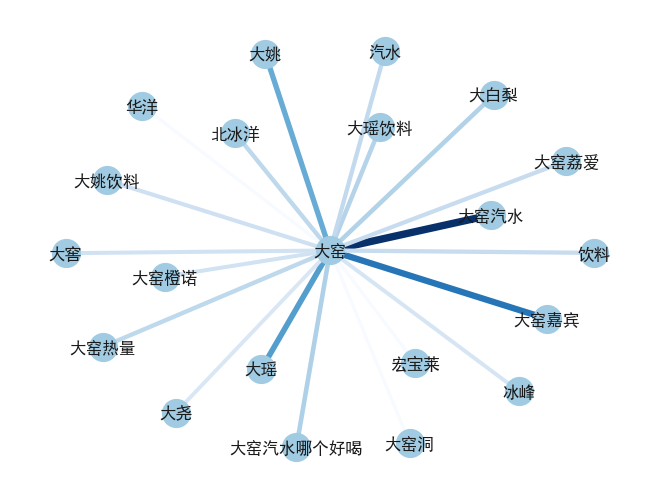

In [47]:
# edge color map

G = nx.from_pandas_edgelist(up_downSearch_1, 'keyword', 'searchword', edge_attr = 'UpOccurence',)
UpOccurence = [i['UpOccurence'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}
pos = nx.spring_layout(G, seed = 62)
colors = UpOccurence
option = {
    'node_color':'#A0CBE2',
    'edge_color':colors,
    'width': UpOccurence,
    'node_size': 400,
    'edge_cmap': plt.cm.Blues,
    'with_labels': True,
}
nx.draw(G, pos, **option)
plt.show()

词云

In [48]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

百事

In [50]:
# Data to dataframe
df = pd.read_csv('./csv/笔记词云-百事可乐-1.1-8.1.csv')

df.head()

,关键词,SUM(曝光量（脱敏）),14日曝光环比,笔记数（脱敏）
0,百事可乐,2953807.40,0.031038,2807.93
1,百事,2261690.00,0.034823,2211.89
2,可乐,947891.60,0.032221,718.93
3,可口可乐,737869.95,0.026973,352.11
4,今天,670250.93,0.018992,401.92


In [51]:
names = ['keyword','exp','14d_rate','NotesCount']
df.columns = names

In [52]:
df = df[['keyword','NotesCount']]

In [53]:
df_wc = df[['keyword', 'NotesCount']][0:100]

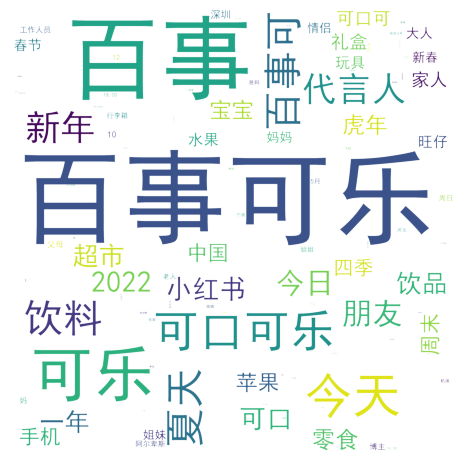

In [54]:
#transform df to dictionary
wc_dict = {}
for word, freq in df_wc.values:
    wc_dict[word] = freq
font_path = './font/simhei.ttf'

wc = WordCloud(
   font_path = font_path, 
    width = 3000,
    height = 3000,
    random_state= 2,
    background_color= 'rgba(255,255,255,0)',
    mode = 'RGBA',
)


wc.generate_from_frequencies(wc_dict)

#.recolor method
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

可口可乐

In [55]:
# Data to dataframe
df = pd.read_csv('./csv/笔记词云-可乐可乐-1.1-8.1.csv')

df.head()

,关键词,SUM(曝光量（脱敏）),14日曝光环比,笔记数（脱敏）
0,可口可乐,7754561.24,0.035249,8013.30
1,可乐,3026154.14,0.034179,1846.51
2,可口,2401510.43,0.035111,1870.39
3,可口可,1743947.24,0.028993,1535.63
4,饮料,1488407.94,0.033837,735.66


In [56]:
names = ['keyword','exp','14d_rate','NotesCount']
df.columns = names
df = df[['keyword','NotesCount']]
df_wc = df[['keyword', 'NotesCount']][0:100]

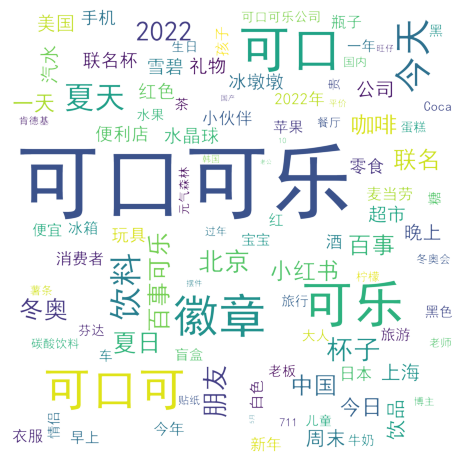

In [57]:
#transform df to dictionary
wc_dict = {}
for word, freq in df_wc.values:
    wc_dict[word] = freq
font_path = './font/simhei.ttf'

wc = WordCloud(
   font_path = font_path, 
    width = 3000,
    height = 3000,
    random_state= 2,
    background_color= 'rgba(255,255,255,0)',
    mode = 'RGBA',
)


wc.generate_from_frequencies(wc_dict)

#.recolor method
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

大窑汽水

In [58]:
# Data to dataframe
df = pd.read_csv('./csv/笔记词云-大窑汽水-1.1-8.1.csv')

df.head()

,关键词,SUM(曝光量（脱敏）),14日曝光环比,笔记数（脱敏）
0,汽水,19930.06,0.115801,23.27
1,饮料,11053.47,0.069778,6.94
2,大窑汽水,10205.44,0.063579,13.68
3,面,10117.71,0.028298,3.06
4,周末,9220.19,0.026999,5.31


In [59]:

df.columns = names
df = df[['keyword','NotesCount']]
df_wc = df[['keyword', 'NotesCount']][0:100]

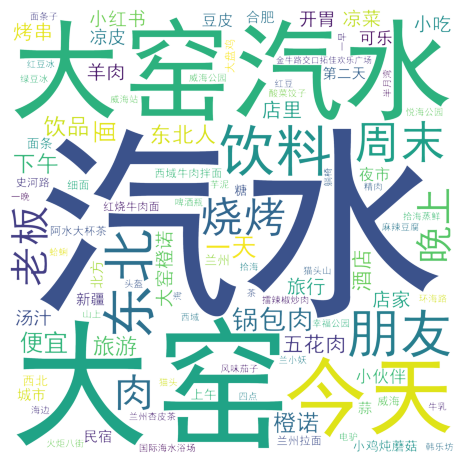

In [60]:
#transform df to dictionary
wc_dict = {}
for word, freq in df_wc.values:
    wc_dict[word] = freq
font_path = './font/simhei.ttf'

wc = WordCloud(
   font_path = font_path, 
    width = 3000,
    height = 3000,
    random_state= 2,
    background_color= 'rgba(255,255,255,0)',
    mode = 'RGBA',
)


wc.generate_from_frequencies(wc_dict)

#.recolor method
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

宏宝莱

In [61]:
# Data to dataframe
df = pd.read_csv('./csv/笔记词云-宏宝莱-1.1-8.1.csv')

df.head()

,关键词,SUM(曝光量（脱敏）),14日曝光环比,笔记数（脱敏）
0,宏宝莱,831142.67,0.035664,262.10
1,冰淇淋,472515.10,0.042833,76.75
2,雪糕,423048.09,0.036857,125.74
3,夏天,285366.71,0.042736,59.20
4,饮品,251927.53,0.037709,18.78


In [62]:

df.columns = names
df = df[['keyword','NotesCount']]
df_wc = df[['keyword', 'NotesCount']][0:100]

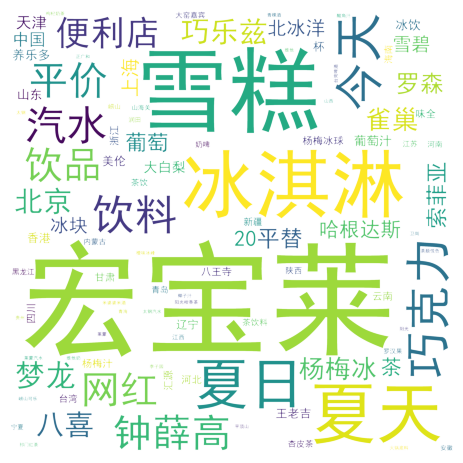

In [63]:
#transform df to dictionary
wc_dict = {}
for word, freq in df_wc.values:
    wc_dict[word] = freq
font_path = './font/simhei.ttf'

wc = WordCloud(
   font_path = font_path, 
    width = 3000,
    height = 3000,
    random_state= 2,
    background_color= 'rgba(255,255,255,0)',
    mode = 'RGBA',
)


wc.generate_from_frequencies(wc_dict)

#.recolor method
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()